# Frequencies Spectra for Individual Particles

In [102]:
import numpy as np
import math
import pandas as pd
import trackpy as tp
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [113]:
roi_size = 20.0
roi_center_x = 776.0
roi_center_y = 597.0
fps = 99.0

In [119]:
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230727spectra\04_an_frequenciesSpectra'
folderPath = r'g:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230822spectra\04_an_frequenciesSpectra'

In [120]:
#pos_filepath = folderPath + r'\inputs' + r'\position_noTiff.txt'
pos_filepath = folderPath + r'\inputs' + r'\position_103V_20230822NoTiff.txt'

In [121]:
col_names = [r'particle_notrack',r'frame',r'x',r'y']

In [122]:
df_pos = pd.read_csv(pos_filepath, header = None, names = col_names)

In [123]:
df_pos.head()

,particle_notrack,frame,x,y
0,1,0,780.188,379.837
1,2,0,896.715,381.002
2,3,0,872.771,382.088
3,4,0,848.078,387.114
4,5,0,636.090,393.319


In [124]:
#cacluate CM of particle cloud for each frame:

In [125]:
df_cm = df_pos.groupby('frame')[['x','y']].mean().reset_index()
df_cm.columns = ['frame', 'x_CM', 'y_CM']

In [126]:
df_pos = df_pos.merge(df_cm, on = 'frame', how = 'left')
df_pos.head()

,particle_notrack,frame,x,y,x_CM,y_CM
0,1,0,780.188,379.837,811.211406,609.49428
1,2,0,896.715,381.002,811.211406,609.49428
2,3,0,872.771,382.088,811.211406,609.49428
3,4,0,848.078,387.114,811.211406,609.49428
4,5,0,636.090,393.319,811.211406,609.49428


In [132]:
df_linked = tp.link(df_pos, 5.0, memory = 0)

Frame 971: 2285 trajectories present.


In [133]:
df_linked.head()

,particle_notrack,frame,x,y,x_CM,y_CM,particle
0,1,0,780.188,379.837,811.211406,609.49428,0
1532,1533,0,716.027,653.842,811.211406,609.49428,1
1533,1534,0,736.667,654.525,811.211406,609.49428,2
1534,1535,0,842.259,654.173,811.211406,609.49428,3
1535,1536,0,926.459,653.215,811.211406,609.49428,4


In [129]:
df_oneframe = df_pos[df_pos['frame'] == 333]

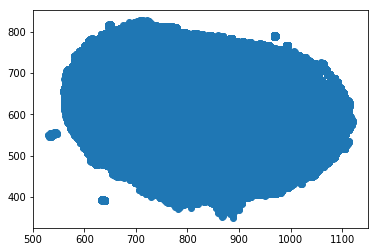

In [130]:
fig, ax = plt.subplots()
ax.scatter(df_pos['x'], df_pos['y'])

In [134]:
roi_condition = ((df_linked['x'] < roi_center_x + roi_size) &
                 (df_linked['y'] < roi_center_y + roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size))

In [135]:
df_roi = df_linked[roi_condition]

In [136]:
df_roi.size

1102381

In [137]:
df_linked.size

15712830

In [138]:
particles_listing = np.unique(df_roi['particle'])

In [139]:
type(particles_listing)

numpy.ndarray

In [140]:
particles_listing

array([   296,    307,    309, ..., 158059, 158061, 158065], dtype=int64)

In [141]:
len(particles_listing)

5650

In [142]:
traj_113 = df_roi[df_roi['particle'] == 113]

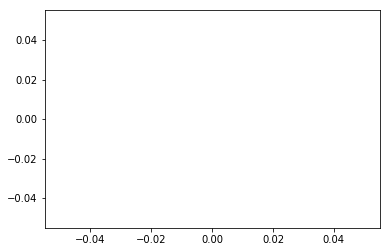

In [143]:
fig, ax = plt.subplots()
ax.plot(traj_113['x'], traj_113['y'])


In [144]:
arr_traj_lengths = np.empty(len(particles_listing))

In [145]:
for i in range(0, len(particles_listing)):
    cur_len = len(df_roi[df_roi['particle'] == particles_listing[i]])
    arr_traj_lengths[i] = cur_len
               

In [146]:
np.max(arr_traj_lengths)

972.0

In [147]:
pd_traj_len = pd.DataFrame({'particle':particles_listing, 'tr_len':arr_traj_lengths})

In [148]:
pd_traj_len.head()

,particle,tr_len
0,296,194.0
1,307,9.0
2,309,43.0
3,333,89.0
4,334,377.0


In [149]:
pd_traj_len.sort_values(by = 'tr_len', ascending = False, inplace = True)

In [150]:
pd_traj_len.head(20)

,particle,tr_len
69,1799,972.0
42,1739,972.0
109,1900,972.0
145,1980,972.0
146,1981,972.0
89,1853,972.0
37,1730,972.0
38,1735,972.0
39,1736,972.0
40,1737,972.0


In [153]:
traj_1799 = df_roi[df_roi['particle'] == 1799].copy()
N = len(traj_1799['x'])

In [154]:
traj_1799['x_rfcm'] = traj_1799['x'] - traj_1799['x_CM'] 
traj_1799['y_rfcm'] = traj_1799['y'] - traj_1799['y_CM'] 
traj_1799.head()

,particle_notrack,frame,x,y,x_CM,y_CM,particle,x_rfcm,y_rfcm
1006,1007,0,705.061,594.407,811.211406,609.494280,1799,-106.150406,-15.087280
3307,3308,1,704.768,593.997,813.529491,609.338894,1799,-108.761491,-15.341894
5651,5652,2,705.131,593.965,814.613029,608.388342,1799,-109.482029,-14.423342
7971,7972,3,705.153,594.001,812.149656,609.497798,1799,-106.996656,-15.496798
10257,10258,4,705.159,594.019,813.784709,610.149651,1799,-108.625709,-16.130651


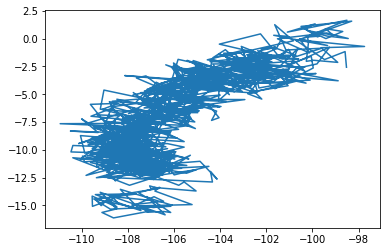

In [156]:

fig, ax = plt.subplots()
ax.plot(traj_1799['x_rfcm'], traj_1799['y_rfcm'])

In [157]:
def get_spectrum_drift(arr_t, arr_sig):
    slope, intercept = np.polyfit(arr_t, arr_sig, 1)
    arr_sig_nodrift = arr_sig - (slope * arr_t + intercept)
    arr_intens = np.fft.fft(arr_sig_nodrift)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    print(N)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [158]:
def get_spectrum(arr_t, arr_sig):
    arr_sig_nomean = arr_sig - np.mean(arr_sig)
    arr_intens = np.fft.fft(arr_sig_nomean)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [161]:
arr_p = np.array(pd_traj_len['particle'])

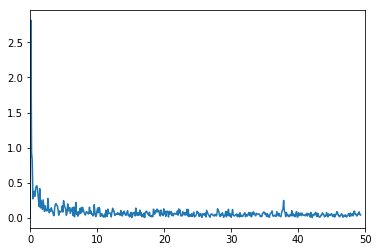

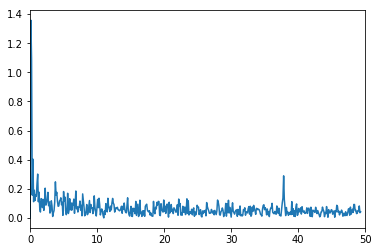

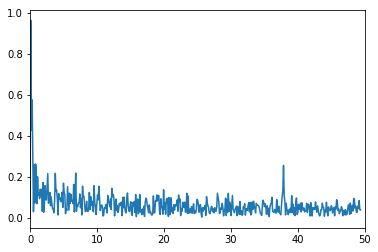

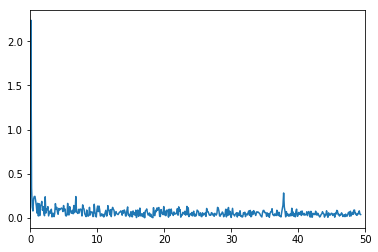

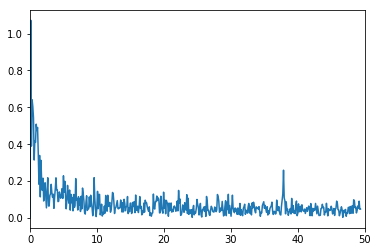

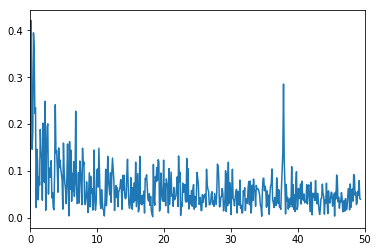

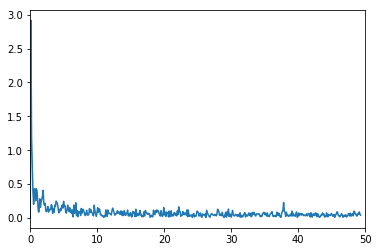

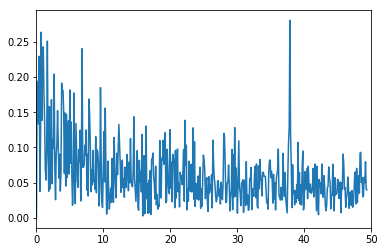

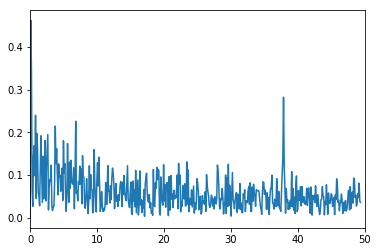

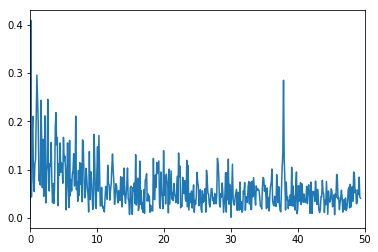

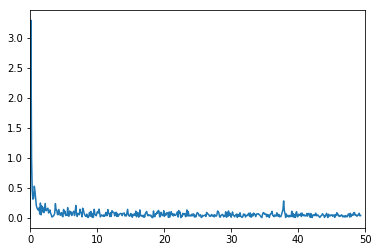

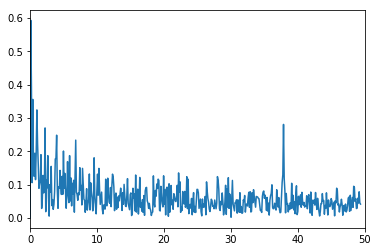

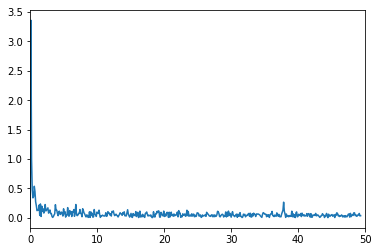

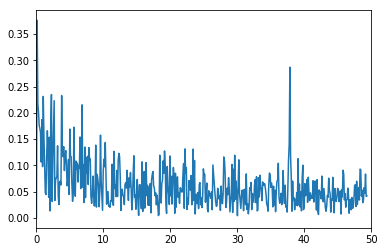

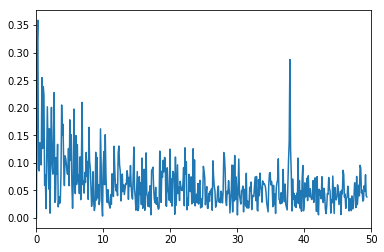

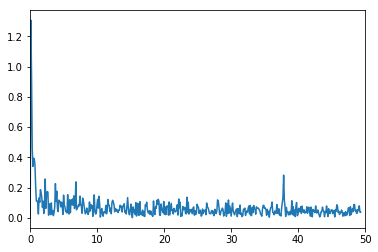

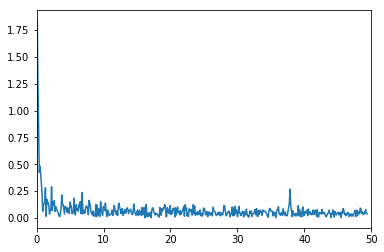

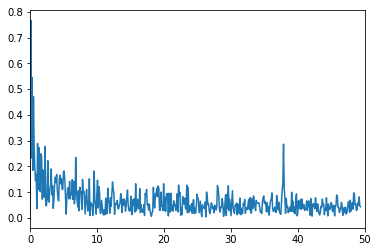

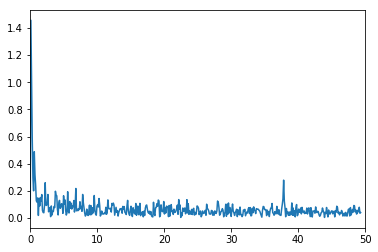

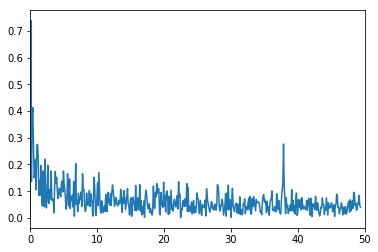

In [166]:
for i in range(0,20):
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['x'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum(arr_time_i, traj_i['x_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    arr_abs_intens = 2.0 / N * np.abs(arr_intens_i[0:N//2])
    arr_savg = savgol_filter(arr_abs_intens, 3, 2)
    ax_i.plot(arr_freqs_i, arr_savg)
    
    

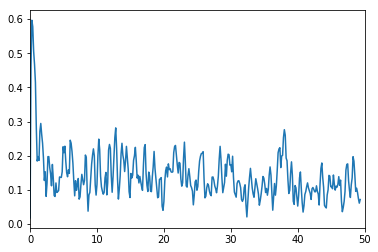

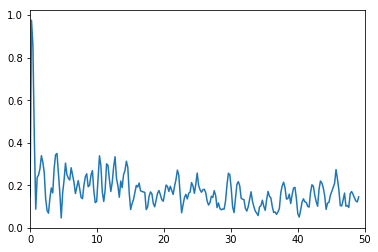

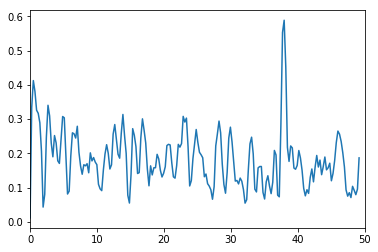

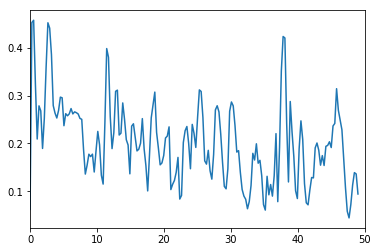

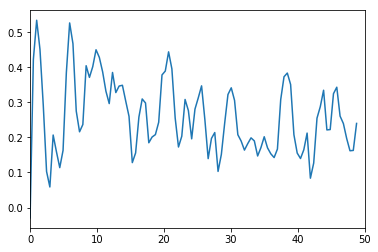

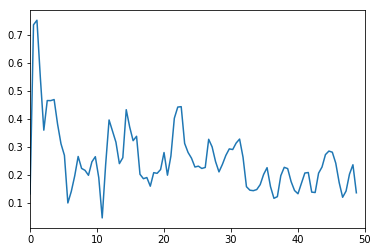

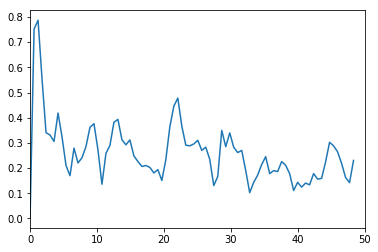

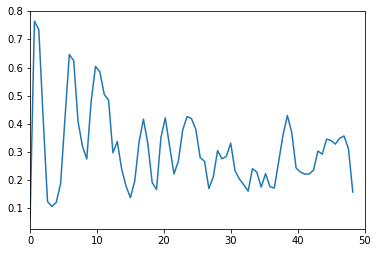

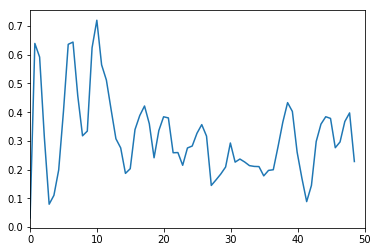

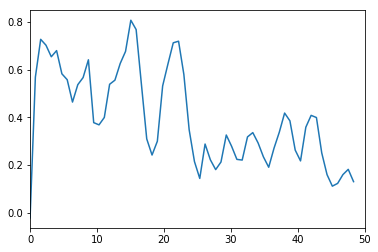

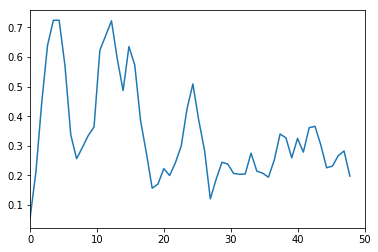

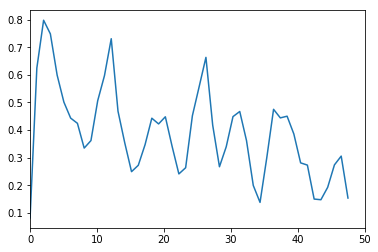

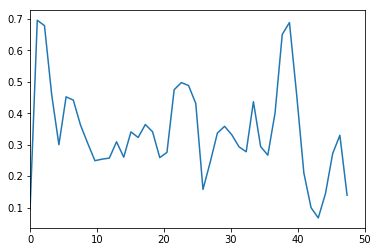

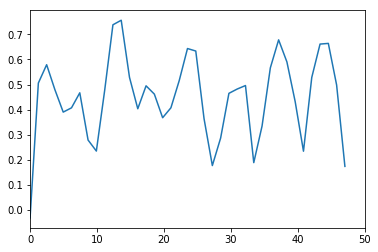

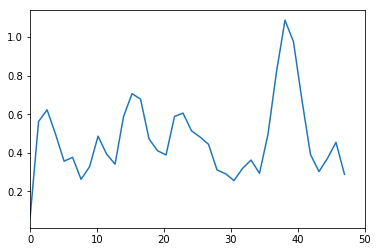

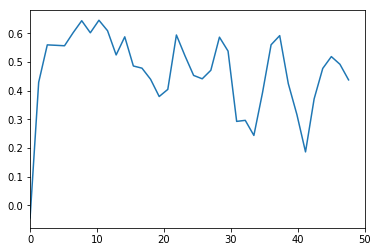

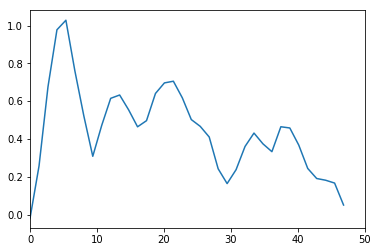

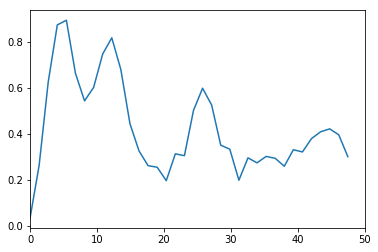

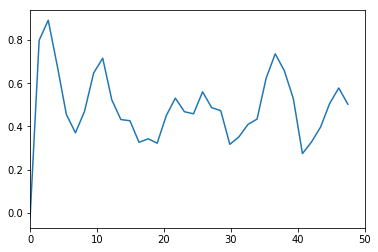

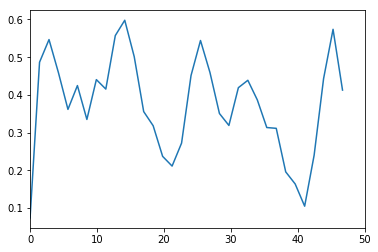

In [110]:
for i in range(0,20):
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['x'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum(arr_time_i, traj_i['y_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    arr_abs_intens = 2.0 / N * np.abs(arr_intens_i[0:N//2])
    arr_savg = savgol_filter(arr_abs_intens, 9, 4)
    ax_i.plot(arr_freqs_i, arr_savg)